In [1]:
#Installing torch with cuda (gpu) support

In [25]:
# !pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu130 -> Pytorch version for CUDA on nvidia 

In [1]:
# !pip uninstall torch

In [61]:
# !pip install onnx onnxruntime onnxscript

## 1. Project Title: Computer Vision for Cassava Disease Detection

Agricultural capacity is one of the most important benchmarks for any thriving economy. As such, it is almost always a high-investment activity. The investments made in agriculture can however be rendered void due to external factors that may be beyond easy detection and control.

This project will aim to employ machine learning for the task of predictinand detecting illnesses in cassava crop d for the purpose of better and improved agricultural profit.

---

## 2. Methodology

This project will be carried out using the __CRISP-DM (Cross Industry Standard Process for Data Mining)__ methodology. This is one of the more popular data science methodologies and is characterized by six important phases, which are as follows:

1. _Business Understanding_,
2. _Data Understanding_,
3. _Data Preparation_,
4. _Data Modelling_,
5. _Model Evaluation_, and
6. _Model Deployment_.

It should be noted that these phases are usually recurrent in nature (i.e., some phases may be repeated). As such, they do not necessarily follow a linear progression.

---

## 3. Tools

The tools of use for this project include:

1. _PIL_
2. _Matplotlib_
3. _PyTorch_
4. _Torchvision_

#### 3.1. PIL

__PIL__ (_Python Image Libary_) is a Python library desined for the purpose of image loading and manipulation.

#### 3.2. Matplotlib

__Matplotlib__ is a Python library for data visualization. Other alternatives include __Bokeh__ and __Plotly__. It can also be used for visualizing images.

#### 3.3. PyTorch and Torchvision

__PyTorch__ is a C/C++ library (with a Python API) for machine learning and deep learning. It provides a lot of utilities and implementations for a variety of machine learning ideas such as __neural networks__, __normalization layers__, and others.

__Torchvision__ is a subset of the PyTorch ecosystem, with specific focus on images and computer vision.

---

<div align="center"><h1>Project Implementation via CRISP-DM</h1></div>

---

<div><h3>01. Business Understanding</h3></div>

__Novel Farms__ is a well-known agricultural giant in the country, being top-notch providers of agricultural products via large-scale, commercialized farming. Their cassava plantation is presently under threat from diseases. At present, detecting and diagnosing these diseases requires the presence of agricultural experts. Given that the plantation is very huge, this would either require __(a.)__ a few experts available round the clock, or __(b.)__ multiple experts available for a short while. Either way, expenses will become a major pain point.

Substituting with an ML model would make it such that they can more easily monitor their cassava crops in real-time. This would be an immense boon to them in the following ways:

1. _Provide a means of monitoring their cassava crop_.
2. _Make it easier to take quick action in the event of disease detection_.

---

<div><h3>02. Data Understanding</h3></div>

With the _**Business Understanding**_ out of the way, the next step is to understand the data to be obtained and used for the task. If ealing with regular tabular data, this would involve the process of __*Exploratory Data Analysis (EDA)*__.

EDA is the process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what can be done with it. They can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis, EDA begins with a set of __questions__ and/or __hypotheses__. The EDA process will then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way.

However, in this instance, since the data is contained in images, this would require some visual assessment of the images. The results of the visualization are outlined below:

In [1]:
import os
from PIL import Image
import numpy as np

from matplotlib import pyplot as plt

### Classes in the Dataset

We can figure out the classes in the dataset.

In [2]:
data_path = "data/train"

In [3]:
# Dataset classes
os.listdir(data_path)

['.DS_Store', 'cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

#### Observation
These classes map to:

1. Cassava Bacterial Blight (CBB),
2. Cassava Brown Steak Disease (CBSD),
3. Cassava Green Mite (CGM),
4. Cassava Mosaic Disease (CMD) and
5. Healthy.

### Class Distribution (i.e., Label Imbalance)

In [4]:
# Class paths
data_paths = [(p, os.path.join(data_path, p)) for p in os.listdir(data_path)]

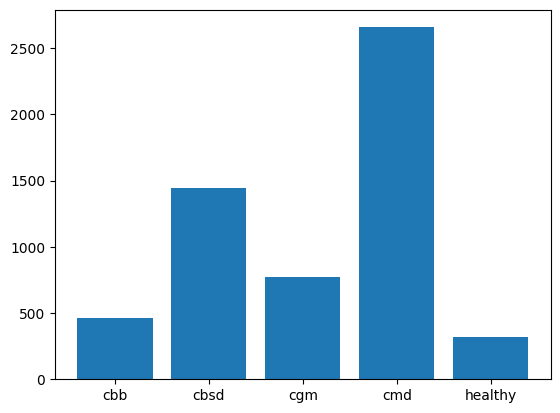

In [5]:
# Class distribution
count_dict = {
    a: len(os.listdir(b))
    for a, b in data_paths
    if os.path.isdir(b)
}

plt.bar(x = count_dict.keys(), height = count_dict.values())

plt.show(); plt.close("all")

### Image Sizes

In addition, we can explore the sizes of the images.

In [6]:
data_paths

[('.DS_Store', 'data/train\\.DS_Store'),
 ('cbb', 'data/train\\cbb'),
 ('cbsd', 'data/train\\cbsd'),
 ('cgm', 'data/train\\cgm'),
 ('cmd', 'data/train\\cmd'),
 ('healthy', 'data/train\\healthy')]

In [7]:
data_paths = [p for p in data_paths if p[0] != '.DS_Store'] #Remove .DS_Store since it isnt a folder

In [8]:
data_paths

[('cbb', 'data/train\\cbb'),
 ('cbsd', 'data/train\\cbsd'),
 ('cgm', 'data/train\\cgm'),
 ('cmd', 'data/train\\cmd'),
 ('healthy', 'data/train\\healthy')]

In [9]:
sample_files = os.listdir(data_paths[0][-1])

In [10]:
sample_files[:10]

['train-cbb-0.jpg',
 'train-cbb-1.jpg',
 'train-cbb-10.jpg',
 'train-cbb-100.jpg',
 'train-cbb-101.jpg',
 'train-cbb-102.jpg',
 'train-cbb-103.jpg',
 'train-cbb-104.jpg',
 'train-cbb-105.jpg',
 'train-cbb-106.jpg']

In [11]:
sample_paths = [
    os.path.join(data_paths[0][-1], f)
    for f in sample_files
]

In [12]:
sample_paths[:10]

['data/train\\cbb\\train-cbb-0.jpg',
 'data/train\\cbb\\train-cbb-1.jpg',
 'data/train\\cbb\\train-cbb-10.jpg',
 'data/train\\cbb\\train-cbb-100.jpg',
 'data/train\\cbb\\train-cbb-101.jpg',
 'data/train\\cbb\\train-cbb-102.jpg',
 'data/train\\cbb\\train-cbb-103.jpg',
 'data/train\\cbb\\train-cbb-104.jpg',
 'data/train\\cbb\\train-cbb-105.jpg',
 'data/train\\cbb\\train-cbb-106.jpg']

In [13]:
image_sizes = []

for f in sample_paths:
    img = np.array(Image.open(f)).astype(int)
    image_sizes.append(img.shape) #img.size also

In [14]:
set(image_sizes)

{(500, 424, 3),
 (500, 476, 3),
 (500, 499, 3),
 (500, 500, 3),
 (500, 505, 3),
 (500, 506, 3),
 (500, 509, 3),
 (500, 510, 3),
 (500, 512, 3),
 (500, 517, 3),
 (500, 526, 3),
 (500, 545, 3),
 (500, 574, 3),
 (500, 596, 3),
 (500, 602, 3),
 (500, 613, 3),
 (500, 620, 3),
 (500, 624, 3),
 (500, 625, 3),
 (500, 666, 3),
 (500, 680, 3),
 (500, 681, 3),
 (500, 704, 3),
 (500, 723, 3),
 (500, 888, 3),
 (500, 959, 3),
 (521, 500, 3),
 (533, 500, 3),
 (575, 500, 3),
 (610, 500, 3),
 (664, 500, 3),
 (665, 500, 3),
 (666, 500, 3),
 (888, 500, 3),
 (1071, 500, 3)}

In [15]:
sample_files = [os.listdir(p[-1])[:4] for p in data_paths if os.path.isdir(p[-1])]

In [16]:
sample_files

[['train-cbb-0.jpg',
  'train-cbb-1.jpg',
  'train-cbb-10.jpg',
  'train-cbb-100.jpg'],
 ['train-cbsd-0.jpg',
  'train-cbsd-1.jpg',
  'train-cbsd-10.jpg',
  'train-cbsd-100.jpg'],
 ['train-cgm-0.jpg',
  'train-cgm-1.jpg',
  'train-cgm-10.jpg',
  'train-cgm-100.jpg'],
 ['train-cmd-0.jpg',
  'train-cmd-1.jpg',
  'train-cmd-10.jpg',
  'train-cmd-100.jpg'],
 ['train-healthy-0.jpg',
  'train-healthy-1.jpg',
  'train-healthy-10.jpg',
  'train-healthy-100.jpg']]

In [17]:
data_paths

[('cbb', 'data/train\\cbb'),
 ('cbsd', 'data/train\\cbsd'),
 ('cgm', 'data/train\\cgm'),
 ('cmd', 'data/train\\cmd'),
 ('healthy', 'data/train\\healthy')]

In [18]:
sample_paths = list(map(lambda x, y: {x[0]: [os.path.join(x[1], y_) for y_ in y]}, data_paths, sample_files))

In [19]:
sample_paths

[{'cbb': ['data/train\\cbb\\train-cbb-0.jpg',
   'data/train\\cbb\\train-cbb-1.jpg',
   'data/train\\cbb\\train-cbb-10.jpg',
   'data/train\\cbb\\train-cbb-100.jpg']},
 {'cbsd': ['data/train\\cbsd\\train-cbsd-0.jpg',
   'data/train\\cbsd\\train-cbsd-1.jpg',
   'data/train\\cbsd\\train-cbsd-10.jpg',
   'data/train\\cbsd\\train-cbsd-100.jpg']},
 {'cgm': ['data/train\\cgm\\train-cgm-0.jpg',
   'data/train\\cgm\\train-cgm-1.jpg',
   'data/train\\cgm\\train-cgm-10.jpg',
   'data/train\\cgm\\train-cgm-100.jpg']},
 {'cmd': ['data/train\\cmd\\train-cmd-0.jpg',
   'data/train\\cmd\\train-cmd-1.jpg',
   'data/train\\cmd\\train-cmd-10.jpg',
   'data/train\\cmd\\train-cmd-100.jpg']},
 {'healthy': ['data/train\\healthy\\train-healthy-0.jpg',
   'data/train\\healthy\\train-healthy-1.jpg',
   'data/train\\healthy\\train-healthy-10.jpg',
   'data/train\\healthy\\train-healthy-100.jpg']}]

In [20]:
samples = dict()

for (x, y), f in zip(data_paths, sample_files):
    samples[x] = [os.path.join(y, y_) for y_ in f]

In [21]:
samples

{'cbb': ['data/train\\cbb\\train-cbb-0.jpg',
  'data/train\\cbb\\train-cbb-1.jpg',
  'data/train\\cbb\\train-cbb-10.jpg',
  'data/train\\cbb\\train-cbb-100.jpg'],
 'cbsd': ['data/train\\cbsd\\train-cbsd-0.jpg',
  'data/train\\cbsd\\train-cbsd-1.jpg',
  'data/train\\cbsd\\train-cbsd-10.jpg',
  'data/train\\cbsd\\train-cbsd-100.jpg'],
 'cgm': ['data/train\\cgm\\train-cgm-0.jpg',
  'data/train\\cgm\\train-cgm-1.jpg',
  'data/train\\cgm\\train-cgm-10.jpg',
  'data/train\\cgm\\train-cgm-100.jpg'],
 'cmd': ['data/train\\cmd\\train-cmd-0.jpg',
  'data/train\\cmd\\train-cmd-1.jpg',
  'data/train\\cmd\\train-cmd-10.jpg',
  'data/train\\cmd\\train-cmd-100.jpg'],
 'healthy': ['data/train\\healthy\\train-healthy-0.jpg',
  'data/train\\healthy\\train-healthy-1.jpg',
  'data/train\\healthy\\train-healthy-10.jpg',
  'data/train\\healthy\\train-healthy-100.jpg']}

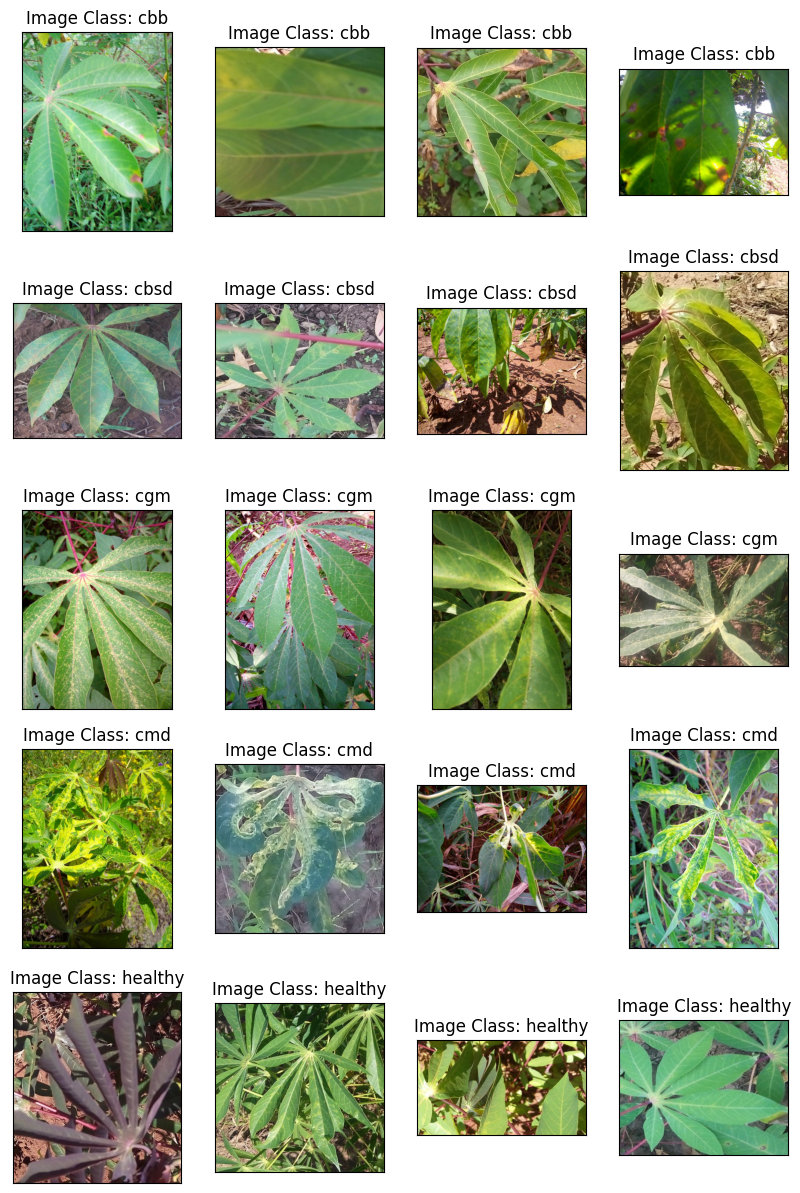

In [22]:
fig, axs = plt.subplots(len(samples), 4, figsize = (10, 15))
i = 0
j = 0

for class_, imgs in samples.items():
    for img in imgs:
        img = Image.open(img)
        axs[i, j].imshow(img)
        axs[i, j].set_title("Image Class: " + class_)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        
        j+=1
    
    j = 0
    i += 1

plt.show(); plt.close("all")

#### Observations

1. There are five categories of cassava images.

2. The images are generally large in size. This would imply that a lot of computation will take place.

4. The sizes of the images vary. This would require us to ensure that the images are of the same size.

5. The image classes are imbalanced. This might require the use of specialized metrics for evaluation, such as __ROC AUC__.

#### 2.3. Data Implications

Implied by our findings above, we can say the following:

1. ___Large size___: The images in the dataset are large in size.

2. ___Varying size___: Apart from magnitude in size, the images also vary in size.

3. __Label imbalance__: The images are not uniformly distributed with respect to their classes.


---

<div><h3>03. Data Preparation</h3></div>

Based on the *__Data Implications__* discovered prior, the following steps will be experimented upon for the data preparation stage.

1. __Image Resizing__: Due to the large, varying sizes of the images, a standardized size will be enforced.

2. __Label Balancing__: The label imbalance might require the use of specialized metrics for evaluation, such as __ROC AUC__. We can also bypass this issue by everaging __pretrained models__.

3. __Pretrained Models__: To minimize learning-related computation, pretrained vision models will be leveraged.


<br>

High-level steps for _Data Preparation_:

1. Import libraries.

2. Set computation device.

3. Implement _Dataset_ class.

4. Load images into memory via _Dataset_ class.

5. Split _Dataset_ into train and test splits.

6. Generate *DataLoader*s from *Dataset*s.

In [23]:
from random import shuffle

import torch

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T

In [24]:
torch.cuda.is_available()

True

In [27]:
# Set computational device as either CPU or GPU (i.e., CUDA)
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Now, we implement the _Dataset_ class. This class need three main methods:

1. **__ init __**

2. **__ getitem __** and

3. **__ len __**

In [28]:
DEVICE

device(type='cuda')

In [29]:
class CassavaDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        if transform is not None:
            self.transform = transform
        else:
            self.transform = T.Compose(
                [
                    T.Resize((224, 224)), # Resize images
                    T.ToTensor(), # Convert images to PyTorch tensors
                    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize images (Values used for imagenet)
                ]
            )
        classes = os.listdir(path)
        classes = [c for c in classes if c != '.DS_Store'] #Remove .DS_Store since it isnt a folder
        print(classes)
        self.class_map = dict(zip(classes, [_ for _ in range(len(classes))]))
        self.files = []

        for class_ in classes:
            self.files +=[(os.path.join(path, class_, f), class_) for f in os.listdir(os.path.join(path, class_))]

        shuffle(self.files)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, ix):
        file = self.files[ix]
        image = Image.open(file[0])

        return self.transform(image), self.class_map[file[-1]]

In [30]:
# Instantiae Dataset object
dataset = CassavaDataset(path = "data/train")

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


In [31]:
dataset.files[:10]

[('data/train\\cbsd\\train-cbsd-1061.jpg', 'cbsd'),
 ('data/train\\cmd\\train-cmd-578.jpg', 'cmd'),
 ('data/train\\healthy\\train-healthy-192.jpg', 'healthy'),
 ('data/train\\cmd\\train-cmd-434.jpg', 'cmd'),
 ('data/train\\cmd\\train-cmd-1329.jpg', 'cmd'),
 ('data/train\\cbsd\\train-cbsd-38.jpg', 'cbsd'),
 ('data/train\\cbsd\\train-cbsd-1147.jpg', 'cbsd'),
 ('data/train\\cmd\\train-cmd-808.jpg', 'cmd'),
 ('data/train\\cmd\\train-cmd-2098.jpg', 'cmd'),
 ('data/train\\cbsd\\train-cbsd-811.jpg', 'cbsd')]

In [32]:
# Number of samples in Dataset
num_samples = len(dataset)

In [33]:
print(num_samples)

5656


In [34]:
# Set test size
test_size = int(num_samples * .30)

In [35]:
# Split dataset into train and test splits
train_ds, test_ds = random_split(dataset = dataset, lengths = [.7, .3])

In [36]:
len(train_ds)

3960

In [37]:
len(test_ds)

1696

In [38]:
BATCH_SIZE = 16

In [39]:
# Generate DataLoaders for faster training in batches...
train_dl, test_dl = (
    DataLoader(dataset = train_ds, batch_size = BATCH_SIZE, shuffle = True),
    DataLoader(dataset = test_ds, batch_size = BATCH_SIZE, shuffle = True)
)

---

<div><h3>04. Data Modelling</h3></div>

High-level steps for _Data Modeling_:

1. Load pretrained model.

2. Reconfigure pretrained model.

    + Resnet-18
  
    + VGG-13
  
3. Initialize model weights.

4. Instantiate training utilities e.g., _optimizer_.

5. Write training loop.

6. Train model.

In [40]:
from torchvision.models import resnet18, vgg16, vgg13
from sklearn.metrics import accuracy_score

In [41]:
def generate_model(out_features, freeze_weights = True, model_function = resnet18):
    base_model = model_function(weights = True)

    if freeze_weights:
        for param in base_model.parameters():
            param.requires_grad_(False)

    # Try to tweak base model to what we want (out_features)
    try:
        # For resnet model
        in_features = base_model.fc.in_features
        new_layer = nn.Linear(in_features, out_features)
        base_model.fc = new_layer
    except:
        # For vgg-13 model
        in_features = base_model.classifier[0].in_features
        new_layer = nn.Linear(in_features, out_features)
        base_model.classifier = new_layer
    
    return base_model

In [42]:
class Model(nn.Module):
    def __init__(self, out_features, freeze_weights = True, model_function=resnet18):
        super().__init__()

        self.base = generate_model(out_features = out_features, freeze_weights = freeze_weights, model_function = model_function)
    
    def forward(self, x):
        x = self.base(x)
        return torch.softmax(x, dim = -1)

In [43]:
# Training hyperparameters
EPOCHS = 20
LR = 1e-3
criterion = nn.CrossEntropyLoss()

NUM_CLASSES = len(dataset.class_map) # Number of data catagories

# Optimizer hyperparameters
FACTOR = 10
AMSGRAD = False
BETAS = (.9, .999)

In [44]:
def initialize_model_weights(model, init_func = nn.init.normal_):
    for name, params in model.named_parameters():
        if name in ["fc", "classifier"]:
            init_func(params)
        else:
            continue
    
    return model

In [45]:
def training_loop(epochs, model, optimizer):
    TRAIN_LOSSES, TEST_LOSSES = [], []
    TRAIN_ACCS, TEST_ACCS = [], []
    
    for epoch in range(epochs):
        train_losses, test_losses = [], []
        train_accs, test_accs = [], []
        
        model.train() # Set model in training mode
        
        for X, y in iter(train_dl):
            X, y = X.to(DEVICE), y.to(DEVICE)
            
            y_pred = model(X.to(DEVICE))
            train_loss = criterion(y_pred, y) #Compare actual targets and predicted targets to get the loss
            train_loss.backward() #Back ppropagate the loss
            optimizer.step()
            optimizer.zero_grad()
            
            train_losses.append(train_loss.item())
    
            train_acc = accuracy_score(y.cpu().numpy(), y_pred.max(dim=-1).indices.cpu().numpy())
            train_accs.append(train_acc)
    
        with torch.no_grad(): # Turn off computational graph so as to what the model has seen doesn't affect the weights
            model.eval() # Set model to evaluation mode
            for X_, y_ in iter(test_dl):
                X_, y_ = X_.to(DEVICE), y_.to(DEVICE)
                y_p = model(X_)
                test_loss = criterion(y_p, y_)
                
                test_losses.append(test_loss.item())
    
                test_acc = accuracy_score(y_.cpu().numpy(), y_p.max(dim=-1).indices.cpu().numpy())
                test_accs.append(test_acc)
            
        avg_train_loss = sum(train_losses) / len(train_losses)
        avg_test_loss = sum(test_losses) / len(test_losses)
    
        avg_train_acc = sum(train_accs) / len(train_accs)
        avg_test_acc = sum(test_accs) / len(test_accs)
    
        print(
            f"Epoch: {epoch+1} | Train loss: {avg_train_loss: .3f} | Test loss: {avg_test_loss: .3f} |",
            f"Train accuracy: {avg_train_acc: .3f} | Test accuracy: {avg_test_acc: .3f}"
        )
    
        TRAIN_LOSSES.append(avg_train_loss)
        TEST_LOSSES.append(avg_test_loss)
    
        TRAIN_ACCS.append(avg_train_acc)
        TEST_ACCS.append(avg_test_acc)

    # Clear CUDA cache
    torch.cuda.empty_cache()
    torch.clear_autocast_cache()

    return {
        "loss": [TRAIN_LOSSES, TEST_LOSSES],
        "accuracy": [TRAIN_ACCS, TEST_ACCS],
        "model": model
    }

### VGG-13

Experiment with __VGG-13__ as:

1. Finetuned block (i.e., weights nonfrozen) and
2. Feature extractor (i.e., weights frozen)

#### VGG-13 with Finetuning

In [46]:
# VGG-13 with weight finetuning
vgg_model = Model(out_features = NUM_CLASSES, freeze_weights = False, model_function = vgg13).to(DEVICE)

C:\Users\predator\anaconda3\envs\ml\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [47]:
# Intialize model weights
vgg_model = initialize_model_weights(vgg_model, init_func = nn.init.normal_)

__NOTE__:


Weight initialization will only be applied to the new layers added. This will allow us retain the pretrained weights.

In [48]:
opt = optim.Adam(
    params = [
        {
            "params": vgg_model.base.classifier.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR, #FACTOR:10
    amsgrad = AMSGRAD,
    betas=BETAS
)

In [49]:
# Train VGG-13 via finetuning
vgg_finetuned = training_loop(model = vgg_model, optimizer = opt, epochs = EPOCHS)

Epoch: 1 | Train loss:  1.031 | Test loss:  1.202 | Train accuracy:  0.874 | Test accuracy:  0.698
Epoch: 2 | Train loss:  1.026 | Test loss:  1.191 | Train accuracy:  0.878 | Test accuracy:  0.710
Epoch: 3 | Train loss:  1.025 | Test loss:  1.194 | Train accuracy:  0.880 | Test accuracy:  0.712
Epoch: 4 | Train loss:  1.024 | Test loss:  1.195 | Train accuracy:  0.880 | Test accuracy:  0.708
Epoch: 5 | Train loss:  1.025 | Test loss:  1.199 | Train accuracy:  0.880 | Test accuracy:  0.702
Epoch: 6 | Train loss:  1.024 | Test loss:  1.199 | Train accuracy:  0.880 | Test accuracy:  0.703
Epoch: 7 | Train loss:  1.028 | Test loss:  1.204 | Train accuracy:  0.877 | Test accuracy:  0.697
Epoch: 8 | Train loss:  1.026 | Test loss:  1.196 | Train accuracy:  0.878 | Test accuracy:  0.705
Epoch: 9 | Train loss:  1.023 | Test loss:  1.201 | Train accuracy:  0.881 | Test accuracy:  0.702
Epoch: 10 | Train loss:  1.026 | Test loss:  1.191 | Train accuracy:  0.879 | Test accuracy:  0.710
Epoch: 11

KeyboardInterrupt: 

#### VGG-13 as Feature Extractor (with Frozen Weights)

In [50]:
# VGG-13 with frozen weights
vgg_model = Model(out_features = NUM_CLASSES, freeze_weights = True, model_function = vgg13).to(DEVICE)

C:\Users\predator\anaconda3\envs\ml\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [51]:
# Intialize model weights
vgg_model = initialize_model_weights(vgg_model, init_func = nn.init.normal_)

In [52]:
opt = optim.Adam(
    params = [
        {
            "params": vgg_model.base.classifier.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas=BETAS
)

In [53]:
# Train VGG-13 via freezing
vgg_frozen = training_loop(model = vgg_model, optimizer = opt, epochs = EPOCHS)

Epoch: 1 | Train loss:  1.432 | Test loss:  1.444 | Train accuracy:  0.473 | Test accuracy:  0.461
Epoch: 2 | Train loss:  1.368 | Test loss:  1.313 | Train accuracy:  0.537 | Test accuracy:  0.588
Epoch: 3 | Train loss:  1.258 | Test loss:  1.281 | Train accuracy:  0.645 | Test accuracy:  0.621
Epoch: 4 | Train loss:  1.237 | Test loss:  1.268 | Train accuracy:  0.666 | Test accuracy:  0.633
Epoch: 5 | Train loss:  1.224 | Test loss:  1.273 | Train accuracy:  0.680 | Test accuracy:  0.630
Epoch: 6 | Train loss:  1.218 | Test loss:  1.282 | Train accuracy:  0.685 | Test accuracy:  0.620
Epoch: 7 | Train loss:  1.211 | Test loss:  1.268 | Train accuracy:  0.692 | Test accuracy:  0.636
Epoch: 8 | Train loss:  1.207 | Test loss:  1.261 | Train accuracy:  0.697 | Test accuracy:  0.642
Epoch: 9 | Train loss:  1.200 | Test loss:  1.259 | Train accuracy:  0.705 | Test accuracy:  0.645
Epoch: 10 | Train loss:  1.197 | Test loss:  1.261 | Train accuracy:  0.707 | Test accuracy:  0.640
Epoch: 11

### Resnet-18

Experiment with __Resnet-18__ as:

1. Finetuned block (i.e., weights nonfrozen) and
2. Feature extractor (i.e., weights frozen)

#### Resnet-18 with Finetuning

In [49]:
# Resnet-18 model with finetuning
resnet_model = Model(out_features = NUM_CLASSES, freeze_weights = False, model_function = resnet18).to(DEVICE)

C:\Users\predator\anaconda3\envs\ml\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [50]:
# Intialize model weights
resnet_model = initialize_model_weights(resnet_model, init_func = nn.init.normal_)

In [51]:
opt = optim.Adam(
    params = [
        {
            "params": resnet_model.base.fc.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas=BETAS
)

In [52]:
# Train Resnet-18 via finetuning
resnet_finetuned = training_loop(model = resnet_model, optimizer = opt, epochs = EPOCHS)

Epoch: 1 | Train loss:  1.332 | Test loss:  1.284 | Train accuracy:  0.584 | Test accuracy:  0.634
Epoch: 2 | Train loss:  1.278 | Test loss:  1.276 | Train accuracy:  0.634 | Test accuracy:  0.637
Epoch: 3 | Train loss:  1.264 | Test loss:  1.268 | Train accuracy:  0.648 | Test accuracy:  0.637
Epoch: 4 | Train loss:  1.256 | Test loss:  1.241 | Train accuracy:  0.653 | Test accuracy:  0.678
Epoch: 5 | Train loss:  1.229 | Test loss:  1.231 | Train accuracy:  0.689 | Test accuracy:  0.677
Epoch: 6 | Train loss:  1.221 | Test loss:  1.231 | Train accuracy:  0.693 | Test accuracy:  0.680
Epoch: 7 | Train loss:  1.210 | Test loss:  1.230 | Train accuracy:  0.701 | Test accuracy:  0.678
Epoch: 8 | Train loss:  1.208 | Test loss:  1.221 | Train accuracy:  0.704 | Test accuracy:  0.686
Epoch: 9 | Train loss:  1.204 | Test loss:  1.221 | Train accuracy:  0.704 | Test accuracy:  0.688
Epoch: 10 | Train loss:  1.204 | Test loss:  1.219 | Train accuracy:  0.706 | Test accuracy:  0.685
Epoch: 11

#### Resnet-18 as Feature Extractor (with Frozen Weights)

In [63]:
# Resnet-18 model with frozen weights
resnet_model = Model(out_features = NUM_CLASSES, freeze_weights = True, model_function = resnet18).to(DEVICE)

In [64]:
# Intialize model weights
resnet_model = initialize_model_weights(resnet_model, init_func = nn.init.normal_)

In [67]:
opt = optim.Adam(
    params = [
        {
            "params": resnet_model.base.fc.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas=BETAS
)

In [68]:
# Train Resnet-18 via freezing
resnet_frozen = training_loop(model = resnet_model, optimizer = opt, epochs = EPOCHS)

Epoch: 1 | Train loss:  1.336 | Test loss:  1.289 | Train accuracy:  0.581 | Test accuracy:  0.628
Epoch: 2 | Train loss:  1.279 | Test loss:  1.277 | Train accuracy:  0.633 | Test accuracy:  0.630
Epoch: 3 | Train loss:  1.270 | Test loss:  1.272 | Train accuracy:  0.637 | Test accuracy:  0.637
Epoch: 4 | Train loss:  1.262 | Test loss:  1.271 | Train accuracy:  0.647 | Test accuracy:  0.639
Epoch: 5 | Train loss:  1.257 | Test loss:  1.268 | Train accuracy:  0.648 | Test accuracy:  0.642
Epoch: 6 | Train loss:  1.255 | Test loss:  1.272 | Train accuracy:  0.652 | Test accuracy:  0.631
Epoch: 7 | Train loss:  1.259 | Test loss:  1.267 | Train accuracy:  0.645 | Test accuracy:  0.636
Epoch: 8 | Train loss:  1.253 | Test loss:  1.270 | Train accuracy:  0.651 | Test accuracy:  0.635
Epoch: 9 | Train loss:  1.254 | Test loss:  1.268 | Train accuracy:  0.650 | Test accuracy:  0.634
Epoch: 10 | Train loss:  1.250 | Test loss:  1.266 | Train accuracy:  0.658 | Test accuracy:  0.639
Epoch: 11

---

<div><h3>05. Model Evaluation</h3></div>

In [69]:
def visualize_training_results(history, key = None):
    if key is not None:
        TRAIN_RESULTS, TEST_RESULTS = history[key]
        
        plt.figure(figsize=(10, 6))
        
        plt.plot(range(EPOCHS), TRAIN_RESULTS, label = f'Training {key.capitalize()}')
        plt.plot(range(EPOCHS), TEST_RESULTS, label = f'Test {key.capitalize()}')
        
        plt.xlabel('Epoch', fontsize=14)
        plt.ylabel(key.capitalize(), fontsize=14)
        
        plt.title(key.capitalize() + ' Evolution of Train and Test', fontsize=16)
        
        plt.legend()
        plt.grid()
        
        plt.show(); plt.close("all")
    
    else:
        TRAIN_LOSSES, TEST_LOSSES = history["loss"]
        TRAIN_ACCURACIES, TEST_ACCURACIES = history["accuracy"]
        
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))
        
        axs[0].plot(range(EPOCHS), TRAIN_LOSSES, label = 'Train Loss')
        axs[0].plot(range(EPOCHS), TEST_LOSSES, label = 'Test Loss')

        axs[0].set_xlabel('Epoch', fontsize=14)
        axs[0].set_ylabel("Loss", fontsize=14)

        axs[0].set_title('Loss Evolution of Train and Test', fontsize=16)

        axs[1].plot(range(EPOCHS), TRAIN_ACCURACIES, label = 'Train Accuracy')
        axs[1].plot(range(EPOCHS), TEST_ACCURACIES, label = 'Test Accuracy')

        axs[1].set_xlabel('Epoch', fontsize=14)
        axs[1].set_ylabel("Accuracy", fontsize=14)
        
        axs[1].set_title('Accuracy Evolution of Train and Test', fontsize=16)
        
        plt.legend()
        
        plt.show(); plt.close("all")

    return

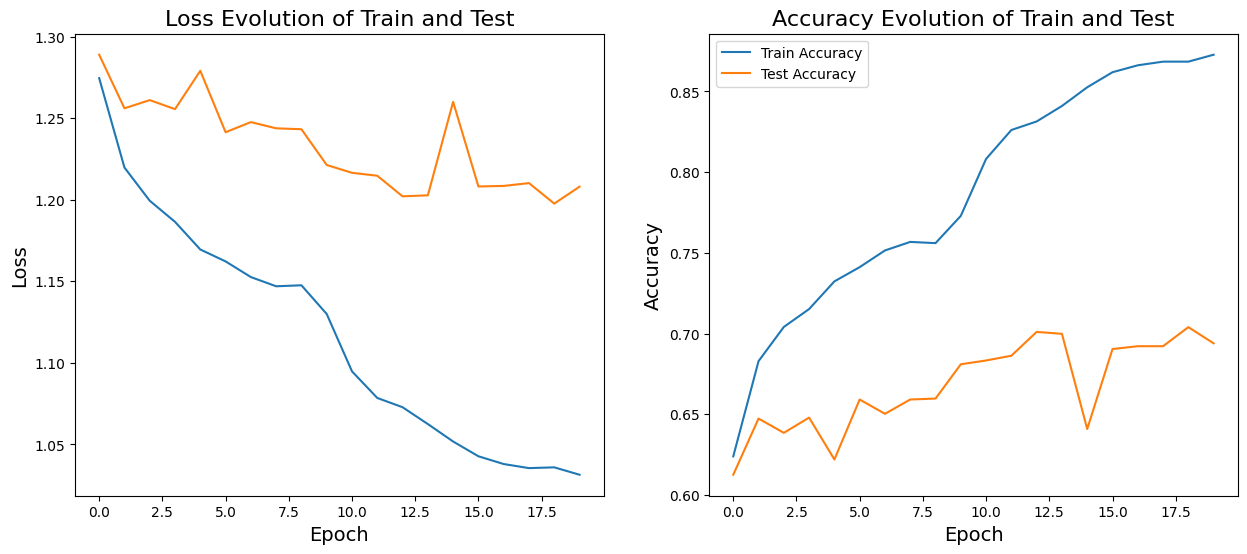

In [71]:
visualize_training_results(vgg_finetuned)

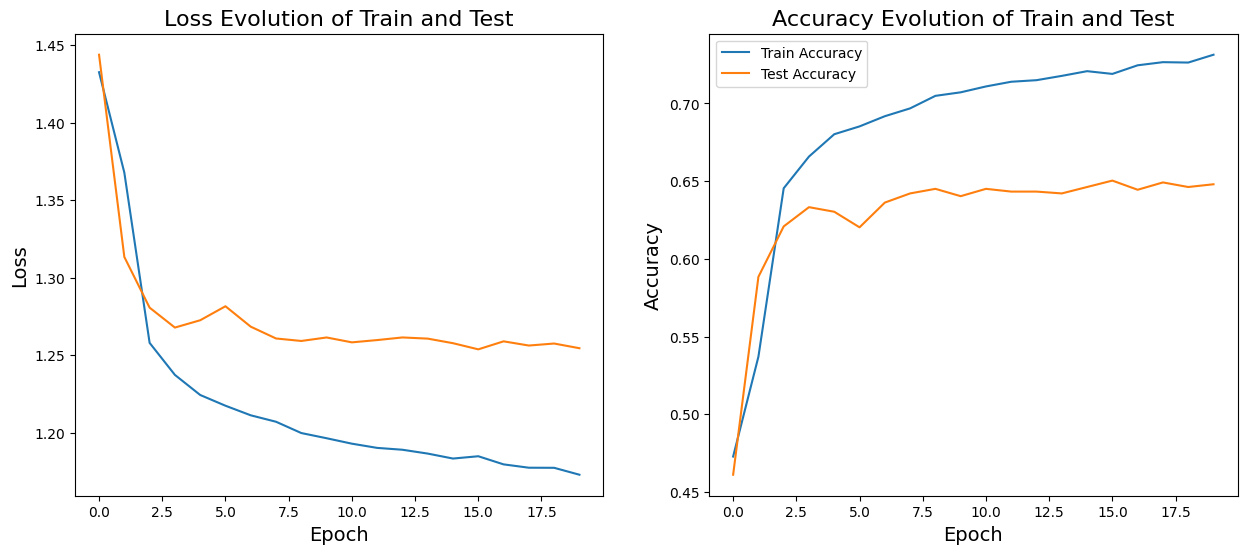

In [72]:
visualize_training_results(vgg_frozen)

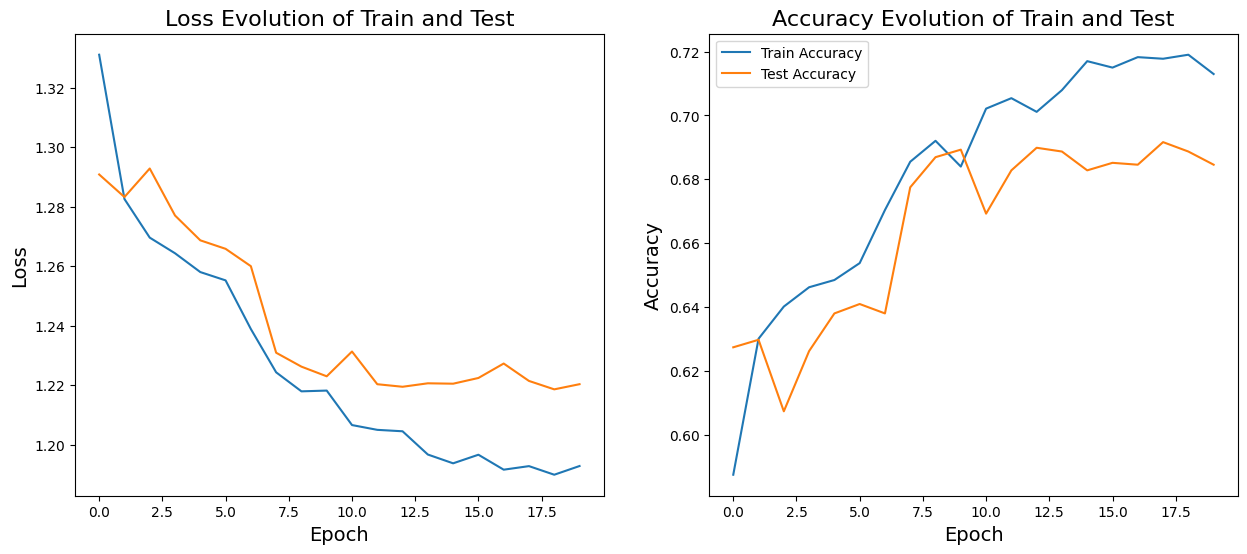

In [70]:
visualize_training_results(resnet_finetuned)

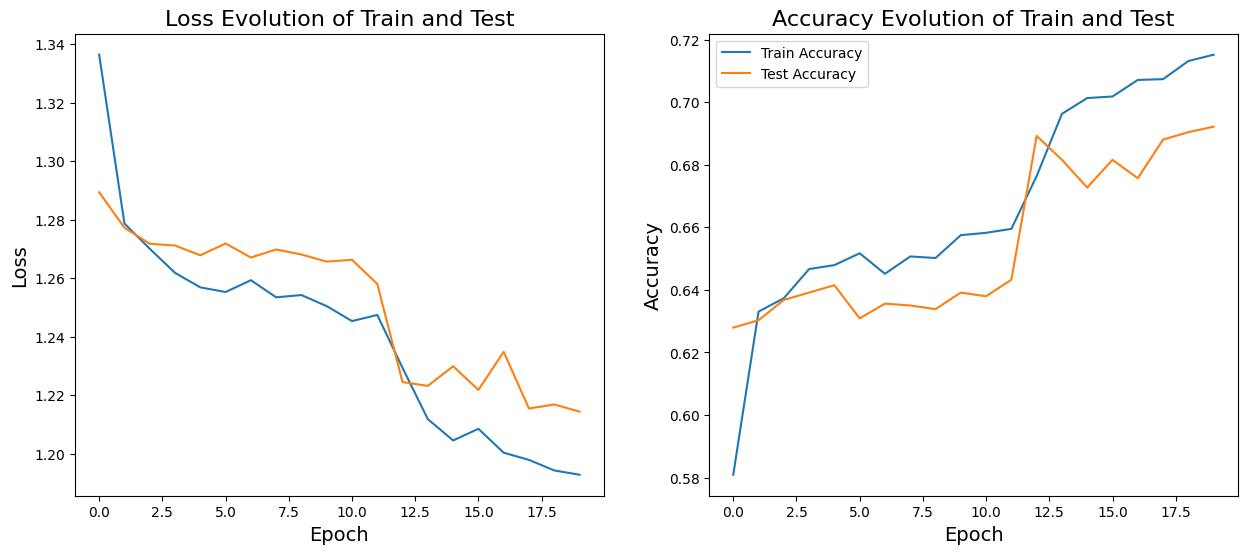

In [73]:
visualize_training_results(resnet_frozen)

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(TRAIN_ACCS, range(EPOCHS), label='Training Accuracy')
plt.plot(TRAIN_ACCS, range(EPOCHS), label='Test Accuracy')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.title('Evolution of Train and Test Accuracies', fontsize=16)

plt.legend()
plt.grid()

plt.show(); plt.close("all")

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report

In [ ]:
def test_model_1(model, data_,):
    train_dl, test_dl = data_

    train_predictions = [
        (y_train.cpu().numpy().reshape(-1, 1), model(X_train.to(DEVICE)).detach().cpu().numpy().reshape(-1, 1))
        for X_train, y_train in iter(train_dl)
    ]
    test_predictions = [
        (y_test.cpu().numpy().reshape(-1, 1), model(X_test.to(DEVICE)).detach().cpu().numpy().reshape(-1, 1))
        for X_test, y_test in iter(test_dl)
    ]

    train_ys = np.concatenate([a for a, b in train_predictions], axis = 0)
    train_preds = np.concatenate([b for a, b in train_predictions], axis = 0)

    train_score = roc_auc_score(train_ys, train_preds, multi_class = "ovo")

    test_ys = np.concatenate([a for a, b in test_predictions], axis = 0)
    test_preds = np.concatenate([b for a, b in test_predictions], axis = 0)

    test_score = roc_auc_score(test_ys, test_preds, multi_class = "ovo")
    # ### Train ROC AUC
    # train_score = [
    #     roc_auc_score(y_train.cpu().numpy().squeeze(), model(X_train.to(DEVICE)).detach().cpu().numpy(), multi_class = "ovr")
    #     for X_train, y_train in iter(train_dl)
    # ]
    # ### Test ROC AUC
    # test_score = [
    #     roc_auc_score(y_test.cpu().numpy().squeeze(), model(X_test.to(DEVICE)).detach().cpu().numpy(), multi_class = "ovr")
    #     for X_test, y_test in iter(test_dl)
    # ]

    # train_score = sum(train_score) / len(train_score)
    # test_score = sum(test_score) / len(test_score)

    return pd.DataFrame(
        data = {
            "Train": [100 * train_score],
            "Test": [100 * test_score],
            "Error (%)": [100 * (train_score - test_score)]
        }
    )

In [ ]:
def test_model_2(model, data_, score_function):
    train_dl, test_dl = data_

    ### Train score
    train_score = [
        score_function(y_train.cpu().numpy().squeeze(), model(X_train.to(DEVICE)).detach().cpu().numpy(),)
        for X_train, y_train in iter(train_dl)
    ]
    ### Test score
    test_score = [
        score_function(y_test.cpu().numpy().squeeze(), model(X_test.to(DEVICE)).detach().cpu().numpy(),)
        for X_test, y_test in iter(test_dl)
    ]

    train_score = sum(train_score) / len(train_score)
    test_score = sum(test_score) / len(test_score)

    return pd.DataFrame(
        data = {
            "Train": [100 * train_score],
            "Test": [100 * test_score],
            "Error (%)": [100 * (train_score - test_score)]
        }
    )

In [ ]:
# Accumulate data for testing
data_ = [
    train_dl,
    test_dl
]

In [ ]:
test_model_2(model = model, data_ = data_)

#### Observation

In order to combat label imbalance, pretrained models were leveraged. These models were utilized both as feature extractors and as finetuned blocks. The results observed were as follows:

1. No serious difference in performance was observed when using the pretrained __Resnet-18__ model as feature extractor (with frozen weights) or as a finetuned block.

2. The pretrained __VGG-13__ model showed good performance when finetuned, but was prone to overfitting.

3. The image sizes had considerable impact on model speed and performance. Training with a size of _600 x 600_ gave a slower, lesser-performing model than with a size of _224 x 224_.

---

<div><h3>Recommendations based on Data Modelling and Model Evaluation Results</h3></div>

<br>

Based on our final observations from the training process, we can make some recommendations:

1. __Training Time__: We could spend more time training by increasing the number of epochs. This might result in better performance.

2. __Pretrained models__: We could try out other pretrained models. Keep in mind that a lot of the might be much bigger and slower to train.

3. __Data Augmentation__: Try out more image augmentations like random rotation, brightness, contrast, hue, and noise.

4. __Hyperparametric Testing__: Try out multiple different values for hyperparameters like the _learning rate_, _betas_, etcetera.

5. __Extra Module__: The extra module added to the pretrained model was a single _nn.Linear_ layer. Making the extra module more complex may result in overfitting, but may also improve results.

6. __Initialization Schemes__: Try out multiple weight initialization schemes. Examples include: __nn.init.\<method>__, where options for method include:

    + __kaiming_normal___,
  
    + __uniform___,
  
    + __ones___ etcetera.

### Model Selection

Following on the observations above, the Resnet models may be selected over the VGG-13 models. Reasons for this choice are:
1. Model Size: Resnet-18 is much smaller than VGG-13. This means both training and inference would be faster.
2. Consistency: As can be seen by the visualizations above, and since it has a smaller generalization error, the Resnet-18 model is more consistent than the VGG-13 model.

### Pre-Deployment (Simple Model Engineering)
Before we can deploy a model, we need to save it to storage. We can either save the whole model (i.e., **model**) or just its properties and parameters (model.state_dict()).
We can also optimize the model before saving. There are multiple ways to do this.
1. Script the model via *torch.jit.script*.
2. Trace the model via *torch,jit.trace*.

Once any of these has been done, we can save the scripted/traced model using its **.save** method
**Note:** Before scripting or tracing model, ensure that the parameters do not require gradients!

In [76]:
# !mkdir artefacts
# !mkdir artefacts/models

In [77]:
selected_model = resnet_finetuned["model"]

In [78]:
for param in selected_model.parameters():
    param.requires_grad_(False)

In [79]:
scripted_model = torch.jit.script(selected_model)
scripted_model.save("./artefacts/models/scripted_model.ptt")

In [80]:
dummy_input = torch.randn(1, 3, 224, 224).to(DEVICE) #BATCH_SIZE, NUM_CHANNELS, IMG_HEIGHT, IMG_WIDTH
traced_model = torch.jit.trace(selected_model, dummy_input)
traced_model.save("./artefacts/models/traced_model.ptt")

---

### 06. Model Deployment

This will make use of ONNX (Open), a model serving (i.e., deployment) package within the PyTorch ecosystem. 

To deploy a model via __TorchServe__, we need a __Model Handler__ which will tell our the _torchserve_ server how to handle our model. It will contain four methods:

1. __Initialize__: Where all required utilities are initialized.

2. __Preprocess__: Where the data provided by the user is prepared before being passed to the model.

3. __Inference__: Where the model prediction process can be configured.

4. __Postprocess__: Where the model predictions are processed as needed e.g., converting numbers to predicted classes.
  
__Note__: Torchserve provided ready made Handlers for these. We will design our custom Handlers though.


In [53]:
# Deploy using ONNX

In [57]:
model = resnet_finetuned['model']  # ORIGINAL nn.Module
# model.eval()

In [71]:
p = next(model.parameters())
p.device.type == "cuda"

True

In [ ]:
# Export model for device (Defaulting to CPU for ONNX)
model = model.cpu()

In [74]:
p.device.type == "cuda"

False

In [73]:
dummy_input = torch.randn(1, 3, 224, 224)
with torch.no_grad():
    torch.onnx.export(
        model,
        dummy_input,
        "./artefacts/models/model.onnx",
        opset_version=18,
        input_names=["input"],
        output_names=["output"],
        do_constant_folding=True
    )

[torch.onnx] Obtain model graph for `Model([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `Model([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 40 of general pattern rewrite rules.
